In [1]:
# Enable interactive plot
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import animation 
import numpy as np
import networkx as nx

<IPython.core.display.Javascript object>


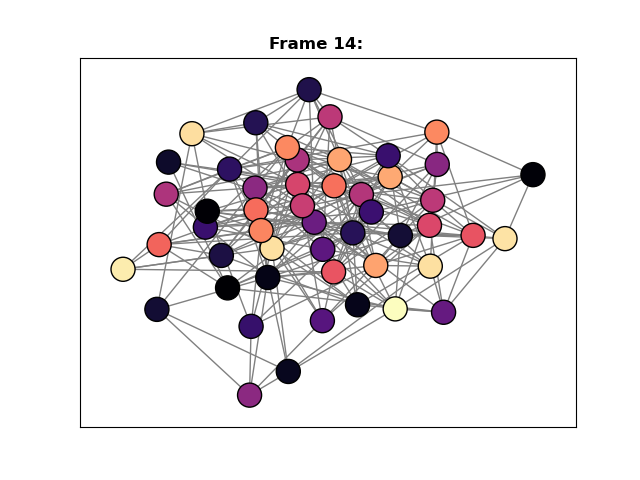

In [2]:
G = nx.erdos_renyi_graph(50, .2)
pos = nx.spring_layout(G)
fig, ax = plt.subplots()

data = np.random.uniform(0, 0.0001, size=(len(G.nodes), 20))

def animation_prep(data):
    
    def update(frame):
        
        # Clear out axes
        ax.clear()
        
        # Get weights for this specific frame for coloring
        color_weights = data[:, frame]

        # Draw out our edges
        nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
        null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=G.nodes, node_color=color_weights,  ax=ax, cmap=plt.cm.magma)
        null_nodes.set_edgecolor("black")
        
        ax.set_title("Frame %d:    "%(frame+1), fontweight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
     
    return update

update = animation_prep(data)
ani = animation.FuncAnimation(fig, update, 20, repeat=True, blit=True)